In [1]:
import geopandas as gpd
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
gdf = gpd.read_file("../data/raw/municipalities/muni_boundary.gpkg")

In [3]:
gdf.head()

,id.namespace,id.lokalId,status,geometristatus,virkningFra,virkningTil,virkningsaktoer,forretningshaendelse,registreringFra,registreringTil,...,landekode,skala,udtraeksdato,kommunekode,LAU1vaerdi,udenforKommuneinddeling,regionskode,regionsLokalId,region,geometry
0,http://data.gov.dk/dagi,389148,vedtaget,endelig,2022-01-01,NaT,Økonomi- og Indenrigsministeriet,ændretBekendtgørelse,2021-12-14 09:46:41,NaT,...,DK,1:10.000,2022-02-04 14:50:06,0370,370,false,1085,389100,NaN,"MULTIPOLYGON (((672902.450 6143708.870, 672880..."
1,http://data.gov.dk/dagi,389144,vedtaget,endelig,2022-01-01,NaT,Geodatastyrelsen,ændretBekendtgørelse,2021-12-14 09:46:41,NaT,...,DK,1:10.000,2022-02-04 14:50:06,0330,330,false,1085,389100,NaN,"MULTIPOLYGON (((654675.250 6154223.210, 654636..."
2,http://data.gov.dk/dagi,389178,vedtaget,endelig,2021-02-19,NaT,Økonomi- og Indenrigsministeriet,fejlrettelseØvrige,2021-02-19 09:03:56,NaT,...,DK,1:10.000,2022-02-04 14:50:06,0766,766,false,1082,389101,NaN,"MULTIPOLYGON (((563379.450 6175110.360, 563346..."
3,http://data.gov.dk/dagi,389166,vedtaget,endelig,2022-01-01,NaT,Økonomi- og Indenrigsministeriet,ændretBekendtgørelse,2021-12-14 10:23:11,NaT,...,DK,1:10.000,2022-02-04 14:50:06,0510,510,false,1083,389102,NaN,"MULTIPOLYGON (((516449.610 6137370.130, 516423..."
4,http://data.gov.dk/dagi,389168,vedtaget,endelig,2022-01-01,NaT,Økonomi- og Indenrigsministeriet,ændretBekendtgørelse,2021-12-14 10:23:11,NaT,...,DK,1:10.000,2022-02-04 14:50:06,0550,550,false,1083,389102,NaN,"MULTIPOLYGON (((482562.400 6122027.620, 482507..."


In [3]:
gdf.columns

Index(['id.namespace', 'id.lokalId', 'status', 'geometristatus', 'virkningFra',
       'virkningTil', 'virkningsaktoer', 'forretningshaendelse',
       'registreringFra', 'registreringTil', 'registreringsaktoer',
       'forretningsomraade', 'forretningsproces', 'DAGIid', 'navn',
       'redigeringsret', 'dataspecifikation', 'landekode', 'skala',
       'udtraeksdato', 'kommunekode', 'LAU1vaerdi', 'udenforKommuneinddeling',
       'regionskode', 'regionsLokalId', 'region', 'geometry'],
      dtype='object')

In [4]:
with open("navn.txt", "w") as opened_file:
    for i in list(gdf.navn):
        opened_file.writelines(i+"\n")


**Make Faxe plot**

/var/folders/66/3jkth_7d5gggg6pyr8yywwt40000gn/T/ipykernel_31572/139024566.py:3: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  gdf_plot = gdf[gdf.intersects(gdf[gdf["navn"]=="Faxe"].geometry.explode()[83][0])].copy()


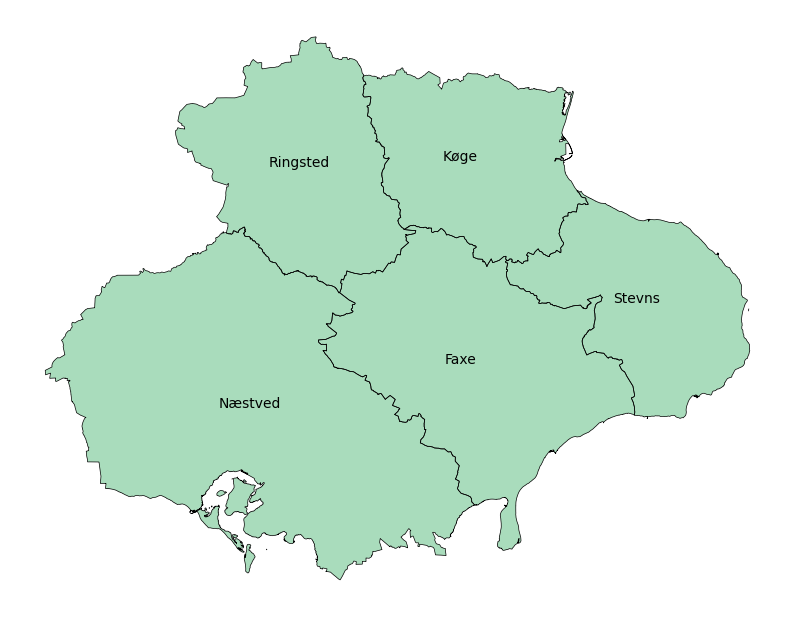

In [5]:
fig, ax = plt.subplots(1,1, figsize = (10,10))

gdf_plot = gdf[gdf.intersects(gdf[gdf["navn"]=="Faxe"].geometry.explode()[83][0])].copy()
gdf_plot.plot(ax=ax, color = "#A9DCBC")
gdf_plot.boundary.plot(ax=ax, color = "black", lw = 0.5)
for i, row in gdf_plot.iterrows():
    ax.text(row.geometry.centroid.x-3000, row.geometry.centroid.y, row.navn)
ax.set_axis_off()
fig.savefig("faxe.png")

**Make Fyn plot**

In [6]:
fyn_muni = [
    "Middelfart",
    "Nordfyns",
    "Odense",
    "Kerteminde",
    "Assens",
    "Faaborg-Midtfyn",
    "Svendborg",
    "Ærø",
    "Langeland",
    "Nyborg"
]

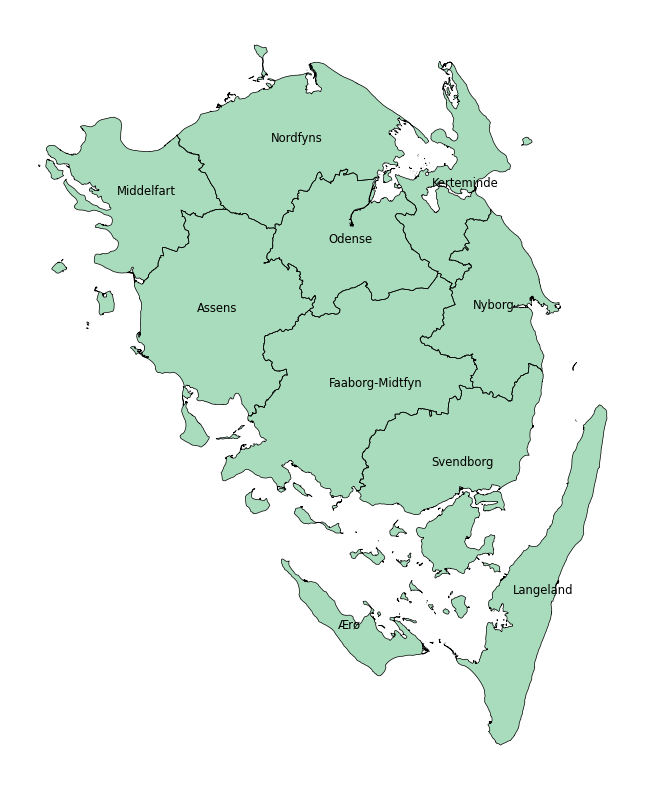

In [7]:
fig, ax = plt.subplots(1,1, figsize = (10,10))

gdf_plot = gdf[gdf.navn.isin(fyn_muni)].copy()
gdf_plot.plot(ax=ax, color = "#A9DCBC")
gdf_plot.boundary.plot(ax=ax, color = "black", lw = 0.5)
for i, row in gdf_plot.iterrows():
    ax.text(row.geometry.centroid.x-3000, row.geometry.centroid.y, row.navn, fontsize = "small")
ax.set_axis_off()
fig.savefig("fyn.png")